# Import standard stuff

In [ ]:
import os
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Conv3D, MaxPooling3D, Concatenate, AveragePooling3D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model

# Inception Block

In [ ]:
def inception_module(prev_layer, filters_1x1, filters_3x3_reduce, filters_3x3,
                    filters_5x5_reduce, filters_5x5, filters_pool_proj, name):
  x1 = Conv3D(filters_1x1, (1,1,1), padding = 'same', activation = 'relu', 
              name = 'conv1x1x1-1')(prev_layer)

  x2 = Conv3D(filters_3x3_reduce, (1,1,1), padding='same', activation = 'relu', 
              name = 'conv1x1x1-3')(prev_layer)
  x2 = Conv3D(filters_3x3, (3,3,3), padding = 'same', activation = 'relu', 
              name = 'conv3x3x3')(x2)

  x3 = Conv3D(filters_5x5_reduce, (1,1,1), padding='same', activation = 'relu', 
              name = 'conv1x1x1-5')(prev_layer)
  x3 = Conv3D(filters_5x5, (3,3,3), padding = 'same', activation = 'relu', 
              name = 'conv5x5x5')(x3)

  x4 = MaxPooling3D((3,3,3),(1,1,1), padding='same', 
                    name = 'MaxPooling3x3x3')(prev_layer)
  x4 = Conv3D(filters_pool_proj, (1,1,1), padding = 'same', activation = 'relu', 
              name = 'conv1x1x1-4')(x4)

  next_layer = Concatenate(axis=-1, name= name)([x1,x2,x3,x4])

  return next_layer

In [ ]:
prev_layer = Input(shape = (100,224,224,3), name='prev_layer')
next_layer = inception_module(prev_layer, 64, 96, 128, 16, 32, 32,'inception3a')
inception_block = Model(inputs=prev_layer, outputs=next_layer)

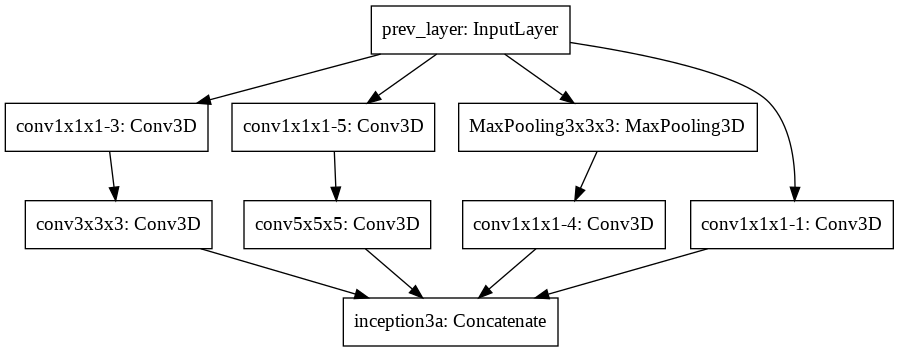

In [ ]:
plot_model(inception_block)

# Complete Architecture

In [ ]:
def inception_module(prev_layer, filters_1x1, filters_3x3_reduce, filters_3x3,
                    filters_5x5_reduce, filters_5x5, filters_pool_proj, name):
  x1 = Conv3D(filters_1x1, (1,1,1), padding = 'same', activation = 'relu')(prev_layer)

  x2 = Conv3D(filters_3x3_reduce, (1,1,1), padding='same', activation = 'relu')(prev_layer)
  x2 = Conv3D(filters_3x3, (3,3,3), padding = 'same', activation = 'relu')(x2)

  x3 = Conv3D(filters_5x5_reduce, (1,1,1), padding='same', activation = 'relu')(prev_layer)
  x3 = Conv3D(filters_5x5, (3,3,3), padding = 'same', activation = 'relu')(x3)

  x4 = MaxPooling3D((3,3,3),(1,1,1), padding='same')(prev_layer)
  x4 = Conv3D(filters_pool_proj, (1,1,1), padding = 'same', activation = 'relu')(x4)

  next_layer = Concatenate(axis=-1, name= name)([x1,x2,x3,x4])

  return next_layer

In [ ]:
def inflated_inception_v1(input_layer):

  x = Conv3D(64, (7, 7, 7), padding='same', strides=(2, 2, 2), activation='relu', name='conv_1_7x7x7')(input_layer)
  x = MaxPooling3D((1, 3, 3), padding='same', strides=(1, 2, 2), name='max_pool_1_1x3x3')(x)
  x = Conv3D(64, (1, 1, 1), padding='same', strides=(1, 1, 1), activation='relu', name='conv_2a_3x3x3')(x)
  x = Conv3D(192, (3, 3, 3), padding='same', strides=(1, 1, 1), activation='relu', name='conv_2b_3x3x3')(x)
  x = MaxPooling3D((1, 3, 3), padding='same', strides=(1, 2, 2), name='max_pool_2_3x3x3')(x)

  x = inception_module(x,
                      filters_1x1=64,
                      filters_3x3_reduce=96,
                      filters_3x3=128,
                      filters_5x5_reduce=16,
                      filters_5x5=32,
                      filters_pool_proj=32,
                      name='inception_3a')

  x = inception_module(x,
                      filters_1x1=128,
                      filters_3x3_reduce=128,
                      filters_3x3=192,
                      filters_5x5_reduce=32,
                      filters_5x5=96,
                      filters_pool_proj=64,
                      name='inception_3b')

  x = MaxPooling3D((3, 3, 3), padding='same', strides=(2, 2, 2), name='max_pool_3_3x3x3')(x)

  x = inception_module(x,
                      filters_1x1=192,
                      filters_3x3_reduce=96,
                      filters_3x3=208,
                      filters_5x5_reduce=16,
                      filters_5x5=48,
                      filters_pool_proj=64,
                      name='inception_4a')

  x = inception_module(x,
                      filters_1x1=160,
                      filters_3x3_reduce=112,
                      filters_3x3=224,
                      filters_5x5_reduce=24,
                      filters_5x5=64,
                      filters_pool_proj=64,
                      name='inception_4b')

  x = inception_module(x,
                      filters_1x1=128,
                      filters_3x3_reduce=128,
                      filters_3x3=256,
                      filters_5x5_reduce=24,
                      filters_5x5=64,
                      filters_pool_proj=64,
                      name='inception_4c')

  x = inception_module(x,
                      filters_1x1=112,
                      filters_3x3_reduce=144,
                      filters_3x3=288,
                      filters_5x5_reduce=32,
                      filters_5x5=64,
                      filters_pool_proj=64,
                      name='inception_4d')

  x = inception_module(x,
                      filters_1x1=256,
                      filters_3x3_reduce=160,
                      filters_3x3=320,
                      filters_5x5_reduce=32,
                      filters_5x5=128,
                      filters_pool_proj=128,
                      name='inception_4e')

  x = MaxPooling3D((2,2,2), padding='same', strides=(2, 2, 2), name='max_pool_4_2x2x2')(x)

  x = inception_module(x,
                      filters_1x1=256,
                      filters_3x3_reduce=160,
                      filters_3x3=320,
                      filters_5x5_reduce=32,
                      filters_5x5=128,
                      filters_pool_proj=128,
                      name='inception_5a')

  x = inception_module(x,
                      filters_1x1=384,
                      filters_3x3_reduce=192,
                      filters_3x3=384,
                      filters_5x5_reduce=48,
                      filters_5x5=128,
                      filters_pool_proj=128,
                      name='inception_5b')

  x = AveragePooling3D((2,7,7), padding='same', name = 'avg_pool_5_2x7x7')(x)

  #x = Dropout(0.4)(x)

  #x = Dense(10, activation='softmax', name='output')(x)

  return x

In [ ]:
input_layer = Input(shape=(100, 224, 224, 3))
output = inflated_inception_v1(input_layer)

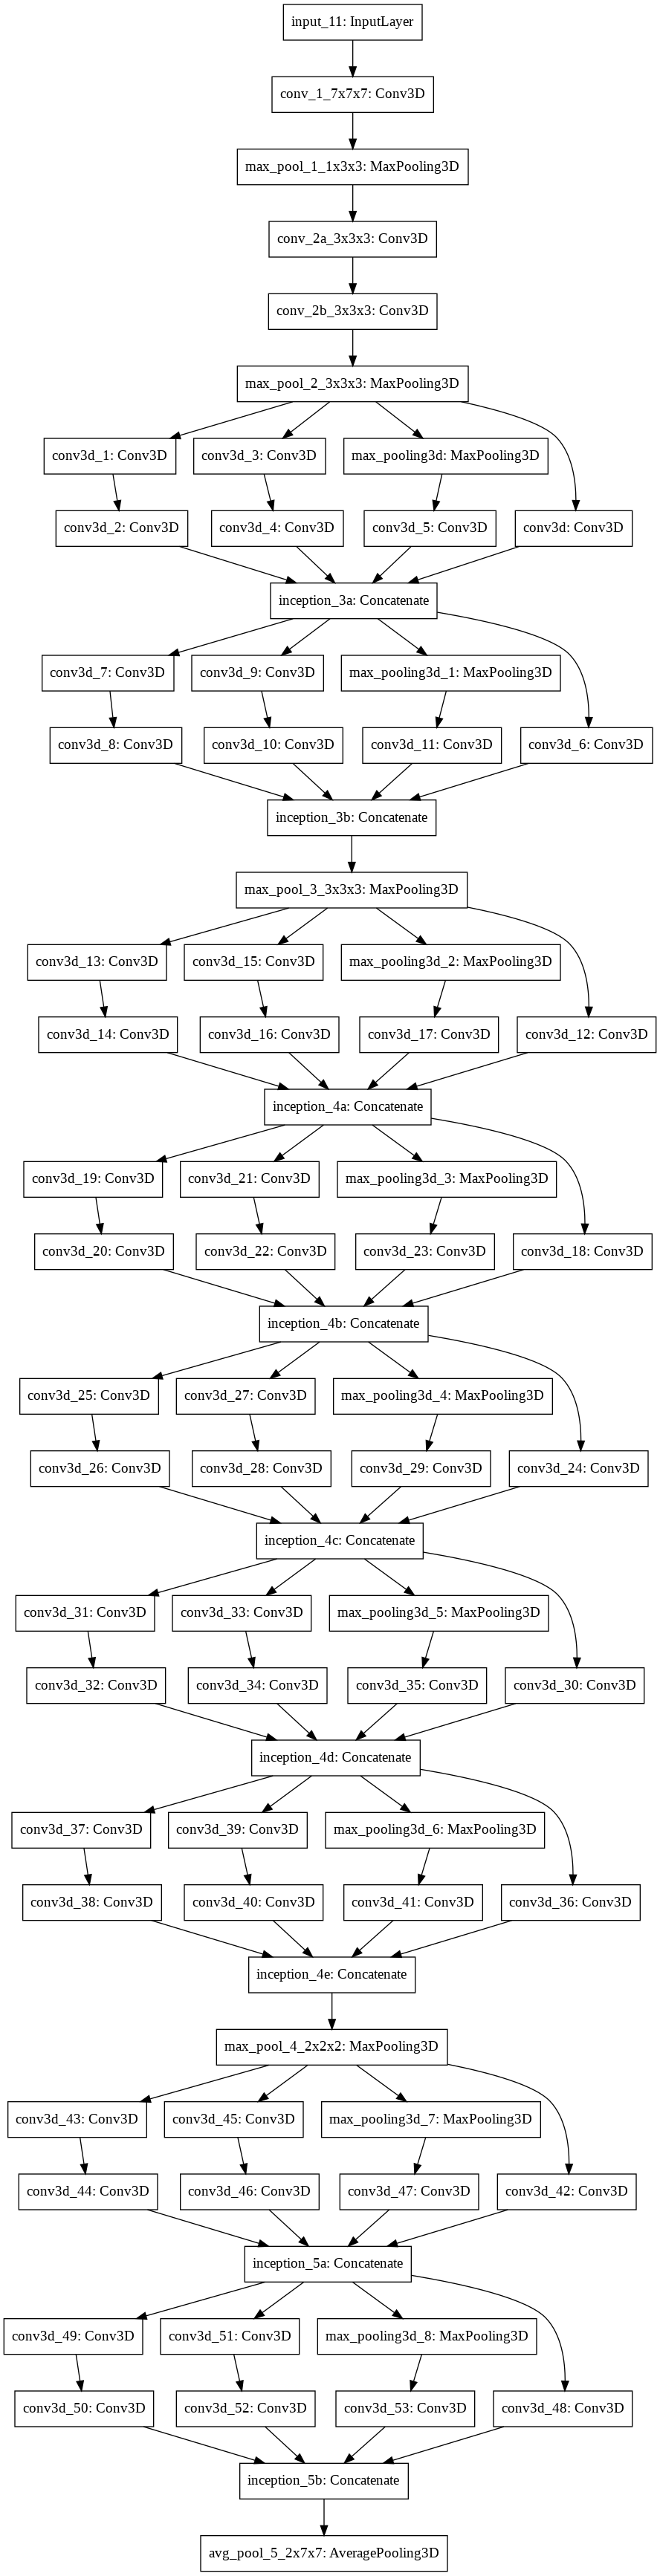

In [ ]:
model = Model(inputs=input_layer, outputs=output)
plot_model(model)